In [4]:
import numpy as np

train_input = np.load('train_input.npy')
train_labels = np.load('train_labels.npy')
val_input = np.load('val_input.npy')
val_labels = np.load('val_labels.npy')
test_input = np.load('test_input.npy')
test_labels = np.load('test_labels.npy')

print(f"Train input shape: {train_input.shape}, Train labels shape: {train_labels.shape}")
print(f"Validation input shape: {val_input.shape}, Validation labels shape: {val_labels.shape}")
print(f"Test input shape: {test_input.shape}, Test labels shape: {test_labels.shape}")

Train input shape: (80, 21, 21), Train labels shape: (80, 2, 21, 21)
Validation input shape: (10, 21, 21), Validation labels shape: (10, 2, 21, 21)
Test input shape: (11, 21, 21), Test labels shape: (11, 2, 21, 21)


In [5]:
import torch
from torch.utils.data import TensorDataset, DataLoader

import torch.nn as nn
import torch.optim as optim

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # First layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=7, padding='same', stride=1)
        self.relu1 = nn.ReLU()
        
        # Five hidden layers
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=7, padding='same', stride=1)
        self.relu2 = nn.ReLU()
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=7, padding='same', stride=1)
        self.relu3 = nn.ReLU()
        
        self.conv4 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=7, padding='same', stride=1)
        self.relu4 = nn.ReLU()
        
        self.conv5 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=7, padding='same', stride=1)
        self.relu5 = nn.ReLU()
        
        self.conv6 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=7, padding='same', stride=1)
        self.relu6 = nn.ReLU()
        
        # Final layer
        self.conv7 = nn.Conv2d(in_channels=16, out_channels=2, kernel_size=7, padding='same', stride=1)
    
    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.relu2(self.conv2(x))
        x = self.relu3(self.conv3(x))
        x = self.relu4(self.conv4(x))
        x = self.relu5(self.conv5(x))
        x = self.relu6(self.conv6(x))
        x = self.conv7(x)
        return x

# Prepare data - add channel dimension to input
train_input_tensor = torch.FloatTensor(train_input).unsqueeze(1)  # (80, 1, 21, 21)
train_labels_tensor = torch.FloatTensor(train_labels)  # (80, 2, 21, 21)
val_input_tensor = torch.FloatTensor(val_input).unsqueeze(1)  # (10, 1, 21, 21)
val_labels_tensor = torch.FloatTensor(val_labels)  # (10, 2, 21, 21)

# Create datasets and dataloaders
train_dataset = TensorDataset(train_input_tensor, train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Initialize model, loss, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
epochs = 4000
train_losses = []
val_losses = []
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_dataset)
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_input_device = val_input_tensor.to(device)
        val_labels_device = val_labels_tensor.to(device)
        val_outputs = model(val_input_device)
        val_loss = criterion(val_outputs, val_labels_device).item()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')
    train_losses.append(train_loss)
    val_losses.append(val_loss)

print('Training completed!')

Epoch [100/4000], Train Loss: 0.000426, Val Loss: 0.000351
Epoch [200/4000], Train Loss: 0.000135, Val Loss: 0.000102
Epoch [300/4000], Train Loss: 0.000125, Val Loss: 0.000077
Epoch [400/4000], Train Loss: 0.000085, Val Loss: 0.000055
Epoch [500/4000], Train Loss: 0.000046, Val Loss: 0.000025
Epoch [600/4000], Train Loss: 0.000050, Val Loss: 0.000026
Epoch [700/4000], Train Loss: 0.000036, Val Loss: 0.000023
Epoch [800/4000], Train Loss: 0.000192, Val Loss: 0.000386
Epoch [900/4000], Train Loss: 0.000055, Val Loss: 0.000017
Epoch [1000/4000], Train Loss: 0.000017, Val Loss: 0.000010
Epoch [1100/4000], Train Loss: 0.000020, Val Loss: 0.000013
Epoch [1200/4000], Train Loss: 0.000020, Val Loss: 0.000016
Epoch [1300/4000], Train Loss: 0.000168, Val Loss: 0.000149
Epoch [1400/4000], Train Loss: 0.000011, Val Loss: 0.000008
Epoch [1500/4000], Train Loss: 0.000013, Val Loss: 0.000011
Epoch [1600/4000], Train Loss: 0.000025, Val Loss: 0.000016
Epoch [1700/4000], Train Loss: 0.000008, Val Loss

In [6]:
#save the model with parameters
torch.save(model.state_dict(), 'cnn_model.pth')

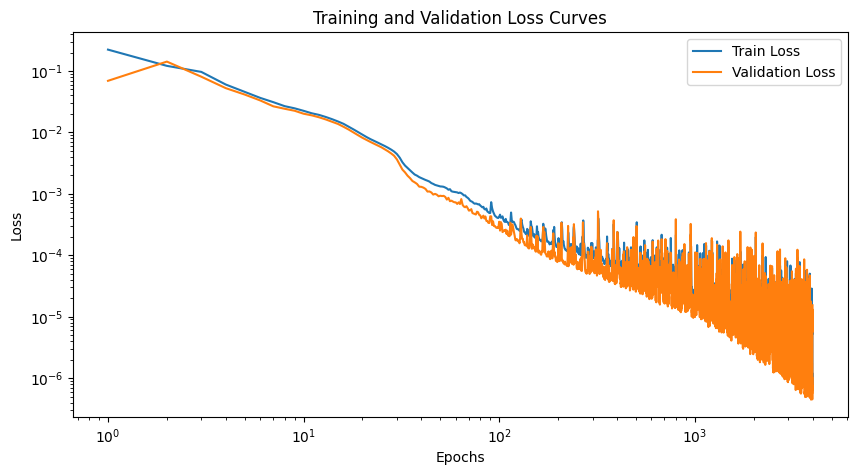

Test Loss: 0.000058


In [7]:
# plot loss curves
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

# test loss
model.eval()
with torch.no_grad():
    test_input_tensor = torch.FloatTensor(test_input).unsqueeze(1).to(device)
    test_labels_tensor = torch.FloatTensor(test_labels).to(device)
    test_outputs = model(test_input_tensor)
    test_loss = criterion(test_outputs, test_labels_tensor).item()
print(f'Test Loss: {test_loss:.6f}')

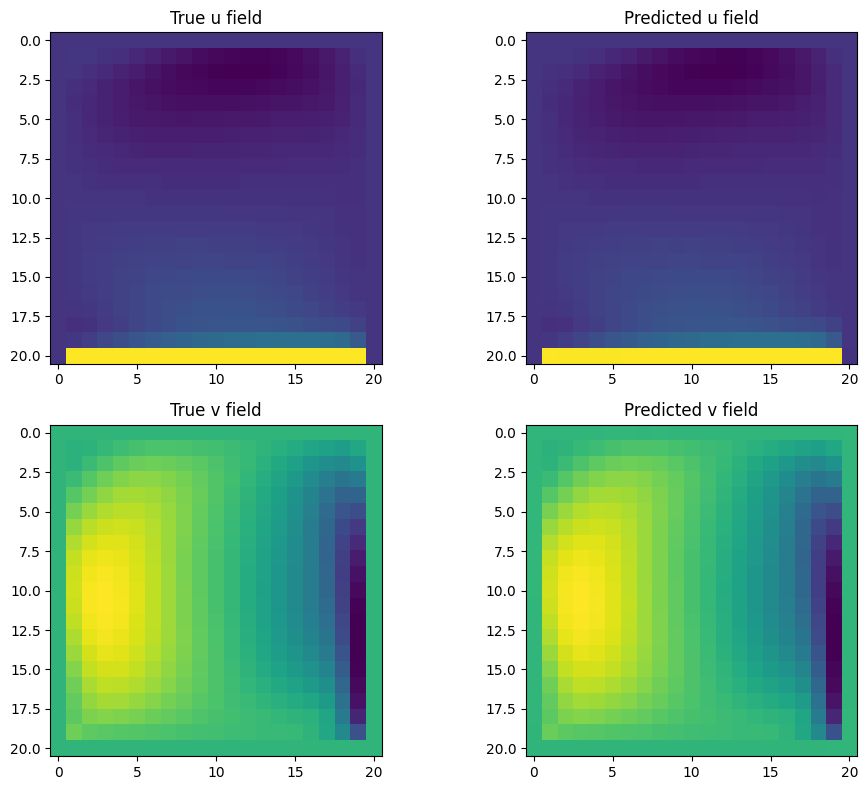

In [8]:
# predict one u,v field from test set and visualise and compare with true field
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    test_input_tensor = torch.FloatTensor(test_input).unsqueeze(1).to(device)  # (10, 1, 21, 21)
    test_outputs = model(test_input_tensor)  # (10, 2, 21, 21)
    test_outputs_cpu = test_outputs.cpu().numpy()
    test_labels_cpu = test_labels  # (10, 2, 21, 21)
    # Visualize the first test sample
    sample_idx = 0
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs[0, 0].imshow(test_labels_cpu[sample_idx, 0], cmap='viridis')
    axs[0, 0].set_title('True u field')
    axs[0, 1].imshow(test_outputs_cpu[sample_idx, 0], cmap='viridis')
    axs[0, 1].set_title('Predicted u field')
    axs[1, 0].imshow(test_labels_cpu[sample_idx, 1], cmap='viridis')
    axs[1, 0].set_title('True v field')
    axs[1, 1].imshow(test_outputs_cpu[sample_idx, 1], cmap='viridis')
    axs[1, 1].set_title('Predicted v field')
    plt.tight_layout()
    plt.show()